# The residuals plot in the paper.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import gridspec

import kepler_kinematics as kek
from scipy.stats import multivariate_normal

plotpar = {'axes.labelsize': 16,
           'font.size': 22,
           'legend.fontsize': 15,
           'xtick.labelsize': 10,
           'ytick.labelsize': 10,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

Load the results file.

In [4]:
results = pd.read_csv("../data/all_kepler4.csv")

In [5]:
results

,Unnamed: 0,Unnamed: 0.1,kepid,vx_inferred,vx_inferred_errp,vx_inferred_errm,vx_inferred_err,vx_random,vy_inferred,vy_inferred_errp,...,vxvx_covar,vxvy_covar,vxvz_covar,vxlnd_covar,vyvy_covar,vyvz_covar,vylnd_covar,vzvz_covar,vzlnd_covar,lndlnd_covar
0,0,0,9716858,61.364897,3.393339,3.462282,3.498267,64.933335,223.984400,17.374561,...,12.240932,60.470377,12.946151,0.015280,321.922383,69.208092,-0.004687,14.906784,-0.001982,0.000307
1,0,0,8715052,-21.030175,3.274697,3.252502,3.300022,-20.757504,235.068585,17.977812,...,10.892866,60.093288,8.517050,-0.001014,333.208792,46.891428,0.003354,6.672057,-0.001406,0.000050
2,0,0,11043806,120.722252,6.041314,5.611924,5.933848,128.718311,226.857613,18.609857,...,35.219361,44.202219,4.745117,0.260807,332.566619,65.423133,-0.012328,13.604085,-0.038061,0.002364
3,0,0,4829715,7.879600,5.875095,6.059206,6.009714,13.324376,223.934387,17.902581,...,36.125690,108.994566,24.446526,0.004978,331.482644,74.199662,-0.006024,16.980779,0.020558,0.003665
4,0,0,9162061,179.290988,8.457096,7.960253,8.199821,177.532965,204.851502,17.882367,...,67.253877,59.260897,24.661778,0.313649,320.317713,64.304103,-0.032303,15.996266,0.066280,0.001826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,0,0,8380088,-6.941554,3.790292,3.855888,3.794517,-4.970740,225.523996,18.203389,...,14.401962,68.278312,11.766084,-0.006771,326.249810,56.219790,-0.004535,9.710190,-0.000726,0.000377
4970,0,0,8815849,50.342318,4.248158,4.299667,4.249547,52.788718,222.865781,17.450477,...,18.063167,70.263192,17.531811,0.036127,301.572824,75.611747,-0.006808,19.046320,-0.003833,0.000879
4971,0,0,6504806,48.994160,5.911039,5.713773,5.766082,53.534247,235.907693,16.883753,...,33.256019,92.764241,25.703498,0.085628,289.072966,86.968283,0.006042,27.852572,-0.054470,0.002123
4972,0,0,8007987,29.091220,4.960884,5.005384,5.020299,28.982175,206.427917,16.927065,...,25.209708,83.926654,29.939785,0.004565,282.044722,99.761748,-0.010540,35.602506,0.005283,0.000276


Merge the results file and the data file.

In [6]:
adf = pd.merge(df, results, on="kepid", how="right")

In [16]:
def resid_plot(vx, vy, vz, vx_inferred, vy_inferred, vz_inferred, vx_inferred_err, vy_inferred_err, vz_inferred_err,
               lndistance_inferred_err, r_est, lndistance_inferred,
               ms=2, alpha=.1, box_size=120):

    fig = plt.figure(figsize=(16, 6), dpi=200)
#     gs = gridspec.GridSpec(2, 3, hspace=.0, wspace=.3, height_ratios=[1, 1])
    gs = gridspec.GridSpec(2, 4, hspace=.0, wspace=.4, height_ratios=[1, 1])

    ax0 = plt.subplot(gs[0, 0])
    xlims = (np.median(vx) - box_size, np.median(vx_inferred) + box_size)
    ax0.plot(vx, vx_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(xlims[0], xlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax0.set_ylim(xlims)
    ax0.set_xlim(xlims)
    ax0.set_ylabel("$\mathrm{V_x~inferred~[kms^{-1}]}$")
    ax0.set_xticklabels([])

    ax1 = plt.subplot(gs[0, 1])
    ylims = (np.median(vy) - box_size, np.median(vy_inferred) + box_size)
    ax1.plot(vy, vy_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(ylims[0], ylims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax1.set_xlim(ylims)
    ax1.set_ylim(ylims)
    ax1.set_ylabel("$\mathrm{V_y~inferred~[kms^{-1}]}$")
    ax1.set_xticklabels([])

    ax2 = plt.subplot(gs[0, 2])
    zlims = (np.median(vz) - box_size, np.median(vz_inferred) + box_size)
    ax2.plot(vz, vz_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(zlims[0], zlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax2.set_xlim(zlims)
    ax2.set_ylim(zlims)
    ax2.set_ylabel("$\mathrm{V_z~inferred~[kms^{-1}]}$");
    ax2.set_xticklabels([])

    ax6 = plt.subplot(gs[0, 3])
    ax6.plot(r_est, lndistance_inferred, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(min(lndistance_inferred), max(lndistance_inferred), 100)
    ax6.plot(xs, xs, "k", ls="--", zorder=1)
    ax6.set_ylabel("$\mathrm{\ln(D/Kpc)~inferred}$")
    
    # Residual panels
    # ---------------------------------------------------------------------------------------------------
    
    ax3 = plt.subplot(gs[1, 0])
#     ax3.errorbar(vx, vx_inferred - vx, yerr=vx_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.plot(vx, vx_inferred - vx, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.errorbar(np.median(vx - 40), -30, yerr=np.median(vx_inferred_err), fmt="k.", ms=4, label="$\mathrm{Typical~uncertainty}$")
    ax3.axhline(0, color="k", ls="--", zorder=1)
    ax3.set_ylim(-box_size, box_size)
    ax3.set_xlim(xlims)
    ax3.set_xlabel("$\mathrm{V_x~true~[kms^{-1}]}$")
#     ax3.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax3.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")
    ax3.legend(fontsize=13)

    ax4 = plt.subplot(gs[1, 1])
#     ax4.errorbar(vy, vy_inferred-vy, yerr=vy_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.plot(vy, vy_inferred-vy, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.errorbar(np.median(vy - 40), -30, yerr=np.median(vy_inferred_err), fmt="k.", ms=4)
    ax4.axhline(0, color="k", ls="--", zorder=1)
    ax4.set_ylim(-box_size, box_size)
    ax4.set_xlim(ylims)
    ax4.set_xlabel("$\mathrm{V_y~true~[kms^{-1}]}$")
#     ax4.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax4.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")

    ax5 = plt.subplot(gs[1, 2])
#     ax5.errorbar(vz, vz_inferred - vz, yerr=vz_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.plot(vz, vz_inferred - vz, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.errorbar(np.median(vz - 40), -30, yerr=np.median(vz_inferred_err), fmt="k.", ms=4)
    print("typical vz uncertainty = ", np.median(vz_inferred_err), np.median(vz_inferred_err/vz)*100)
    ax5.axhline(0, color="k", ls="--", zorder=1)
    ax5.set_ylim(-box_size, box_size)
    ax5.set_xlim(zlims)
    ax5.set_xlabel("$\mathrm{V_z~true~[kms^{-1}]}$")
#     ax5.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax5.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")

    ax7 = plt.subplot(gs[1, 3])
#     ax7.errorbar(r_est, lndistance_inferred-r_est, fmt="k.", yerr=lndistance_inferred_err, ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.plot(r_est, lndistance_inferred-r_est, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.errorbar(0, -.1, yerr=np.median(lndistance_inferred_err), fmt="k.", ms=4)
    ax7.axhline(0, color="k", ls="--", zorder=1)
    ax7.set_ylim(-.5, .5)
    ax7.set_xlabel("$\mathrm{\ln(D/Kpc)~true}$")
    ax7.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")
        
    return fig

typical vz uncertainty =  4.235859587252948 8.332662773405925


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


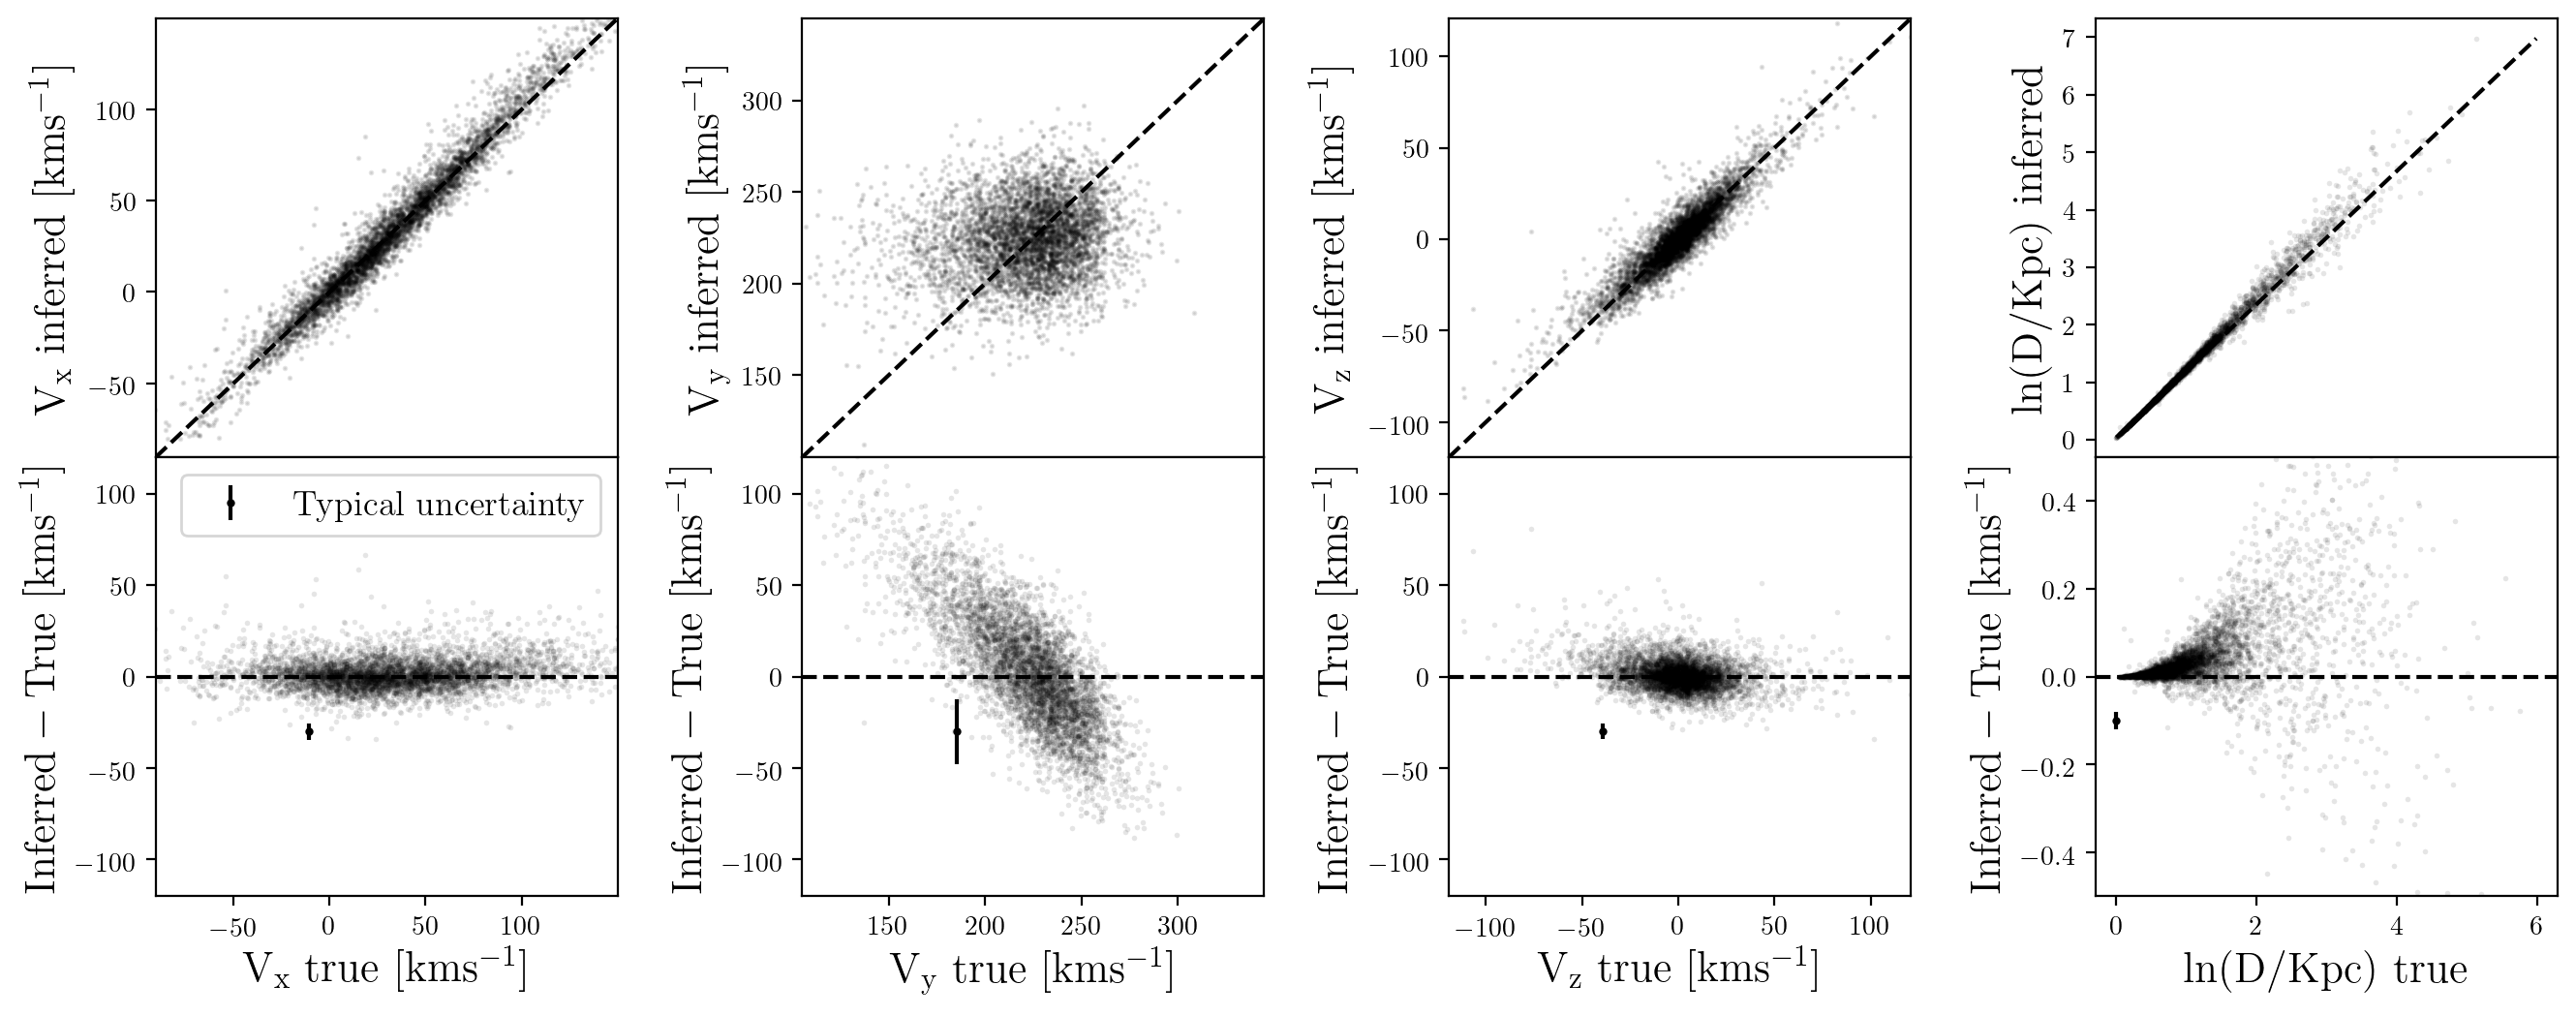

In [17]:
m = np.isfinite(adf.vx.values) & np.isfinite(adf.vy.values) & np.isfinite(adf.vz.values)
m &= np.isfinite(adf.vx_random.values) & np.isfinite(adf.vy_random.values) & np.isfinite(adf.vz_random.values) & np.isfinite(adf.lndistance_random.values)
fig = resid_plot(adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], adf.vx_random.values[m],
                 adf.vy_random.values[m], adf.vz_random.values[m],
                 adf.vx_inferred_err.values[m], adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m],
                 adf.lndistance_inferred_err.values[m],
                 adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]))

plt.tight_layout()
plt.savefig("../plots/residuals")
plt.savefig("../paper/residuals.pdf")

In [21]:
print(f"Median vx uncertainty = {np.median(adf.vx_inferred_err):.2f} km/s, {np.median(adf.vx_inferred_err)/np.median(adf.vx_inferred)*100:.2f} %")
print(f"Median vy uncertainty = {np.median(adf.vy_inferred_err):.2f} km/s, {np.median(adf.vy_inferred_err)/np.median(adf.vy_inferred)*100:.2f} %")
print(f"Median vz uncertainty = {np.median(adf.vz_inferred_err):.2f} km/s, {np.median(adf.vz_inferred_err)/np.median(adf.vz_inferred)*100:.2f} %")
print(f"Median lnD uncertainty = {np.median(np.exp(adf.lndistance_inferred_err)):.2f} pc, {np.median(adf.lndistance_inferred_err)*100:.2f} %")

def RMS(y):
    return np.sqrt(np.mean(y**2))

def MAD(y1, y2):
    return np.median(abs(y1-y2))


print(f"vx RMS = {RMS(adf.vx_inferred-adf.vx):.2f} km/s, MAD = {MAD(adf.vx_inferred, adf.vx):.2f}")
print(f"vy RMS = {RMS(adf.vy_inferred-adf.vy):.2f} km/s, MAD = {MAD(adf.vy_inferred, adf.vy):.2f}")
print(f"vz RMS = {RMS(adf.vz_inferred-adf.vz):.2f} km/s, MAD = {MAD(adf.vz_inferred, adf.vz):.2f}")

Median vx uncertainty = 4.54 km/s, 15.24 %
Median vy uncertainty = 17.81 km/s, 7.93 %
Median vz uncertainty = 4.24 km/s, 844.36 %
Median lnD uncertainty = 1.02 pc, 2.07 %
vx RMS = 7.43 km/s, MAD = 3.64
vy RMS = 28.33 km/s, MAD = 15.56
vz RMS = 7.16 km/s, MAD = 3.52


How many stars lie within 1 sigma?

0.7322074788902292
0.7539203860072377
0.7605548854041013
1.0


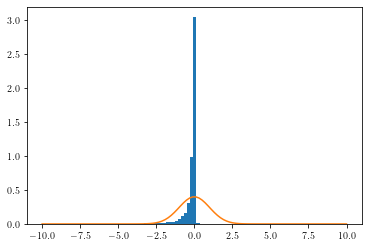

In [19]:
def gauss(x, mu, sig):
    return 1./(sig * np.sqrt(2 * np.pi)) * np.exp(-.5 * (x - mu)**2 / sig**2)

# plt.hist(nsigma[abs(nsigma) < 10], 50, density=True);
# xs = np.linspace(-10, 10, 100)
# plt.plot(xs, gauss(xs, 0, 1))

nsigma = (adf.vx_inferred.values - adf.vx.values)/adf.vx_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.vy_inferred.values - adf.vy.values)/adf.vy_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.vz_inferred.values - adf.vz.values)/adf.vz_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.lndistance_inferred.values - np.log(1./adf.parallax.values))/adf.lndistance_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

plt.clf()
plt.hist(nsigma[abs(nsigma) < 10], 50, density=True);
xs = np.linspace(-10, 10, 100)
plt.plot(xs, gauss(xs, 0, 1))

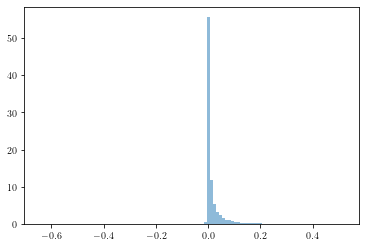

In [72]:
# plt.hist(adf.lndistance_inferred.values, density=True, alpha=.5);
# plt.hist(np.log(1/adf.parallax.values), density=True, alpha=.5);
plt.hist(np.log(1/adf.parallax.values) - adf.lndistance_inferred.values, 100, density=True, alpha=.5);

In [42]:
p = np.zeros(len(adf))
from tqdm import trange
for i in trange(len(adf)):
    cov = [[adf.vx_inferred_err.values[i]**2, 0, 0, 0],
           [0, adf.vy_inferred_err.values[i]**2, 0, 0],
           [0, 0, adf.vz_inferred_err.values[i]**2, 0],
           [0, 0, 0, adf.lndistance_inferred_err.values[i]**2]]
    mvn = multivariate_normal([adf.vx_inferred.values[i], adf.vy_inferred.values[i],
                               adf.vz_inferred.values[i], adf.lndistance_inferred.values[i]], cov)
    p[i] = mvn.pdf([adf.vx.values[i], adf.vy.values[i], adf.vz.values[i], np.log(adf.r_est.values[i]*1e-3)])

100%|██████████| 4987/4987 [00:01<00:00, 3577.65it/s]


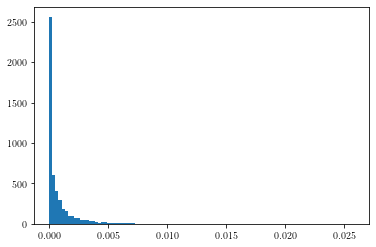

In [43]:
plt.hist(p, 100);

In [41]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
def gauss(x, mu, sig):
    return 1./(sig * np.sqrt(2 * np.pi)) * np.exp(-.5 * (x - mu)**2 / sig**2)

0.24197072451914337


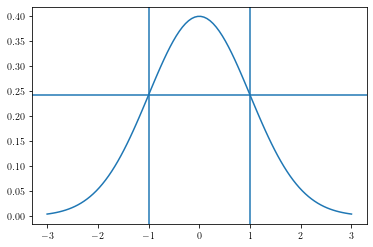

In [44]:
xs = np.linspace(-3, 3, 100)
plt.plot(xs, gauss(xs, 0, 1))
plt.axvline(1)
plt.axvline(-1)
plt.axhline(gauss(1., 0., 1.))
print(gauss(1., 0., 1.))